**Kaggle Database **


Uploading Kaggle.json File:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaibhavagarwal14","key":"7fe50f96e4ab24302b9fc597b1c64437"}'}

Setting Path for the kaggle.json File:

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Downloading The Dataset From Kaggle:

Public Datset :: !kaggle datasets download -d vaibhavagarwal14/harry-and-five-others( **api to download DataSet** )

Original Creator: Vaibhav Agarwal

In [ ]:
!kaggle datasets download -d vaibhavagarwal14/harry-and-five-others

 45% 9.00M/20.1M [00:00<00:00, 36.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 66.9MB/s]


**Unziping The Downloaded Data**

In [ ]:
!unzip harry-and-five-others.zip

Archive:  harry-and-five-others.zip
replace Harry/Albus Dumbledore/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Importing The Required Libraries**

In [ ]:
import os
import pandas as pd

**Listing The Dataset Directory**

In [ ]:
os.listdir('Harry')

['Draco Malfoy',
 'Hermione Granger',
 'Ron Weasley',
 'models',
 'Harry Potter',
 'Albus Dumbledore',
 'Lord Voldemort']

*Applying The data Augmentation*

**Refernce For more Information**:
**https://docs.fast.ai/vision.transform.html** 



**Importing The Required Libraries**:

*Setting the Environment*

**Importing**:Fastai library

**https://docs.fast.ai/** :: For Further Refernce 

**Setting to Ignore the Warning**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)


**Calling the get_transforms() function**:: Used for **Data Augmentation**

**ImageDataBunch()** :: Prepare Data So that it can be trained.
**For Further Refernce**  ::  *https://docs.fast.ai/vision.data.html#ImageDataBunch*

In [1]:
path = "Harry"
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( path, valid_pct=0.2, bs=64, size=112, ds_tfms=get_transforms(True))
data.classes

NameError: ignored

*Printing The Name of Class Followed By Number Of Images In it!!*

In [ ]:
for i in enumerate(data.classes):
    images = os.listdir("Harry/"+str(i[1]))
    print(i[1],end=' :')
    len(images)
    print(len(images))

Albus Dumbledore :446
Draco Malfoy :478
Harry Potter :525
Hermione Granger :525
Lord Voldemort :425
Ron Weasley :493


**Training Model**

*We are going to use Resnet50(PreBuilt in Fastai Library), other models for training are also availaible in the fastai Library Such as Resnet34, Resnet 101,Resnet 18*

*For Further Refernce* : **https://docs.fast.ai/vision.models.html**



**Looking at the data with Specified Rows using show_batch() function**

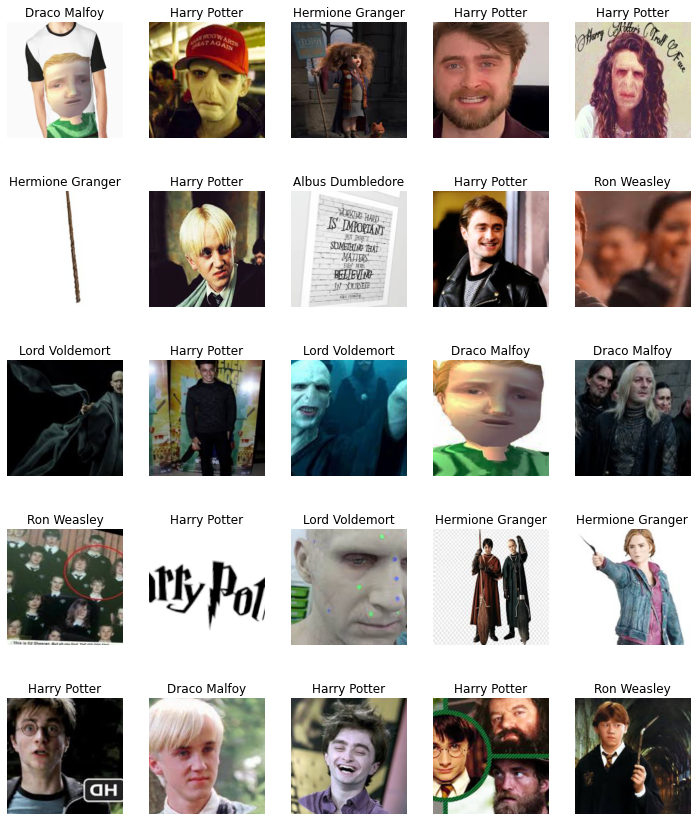

In [ ]:
np.random.seed(2)
data.show_batch(rows=5,figsize=(10,12))

**Most Important Part**

Calling the **resnet 50** for training our model

Passing The number of times we want to train the model in fit_one_cycle() as arguement.


In [ ]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,2.221657,1.405604,0.602076,00:28


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.617028,1.395624,0.643599,00:31


In [ ]:
learn.save('stage-1')

Result

**Viewing in which classes our model is most Confused**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

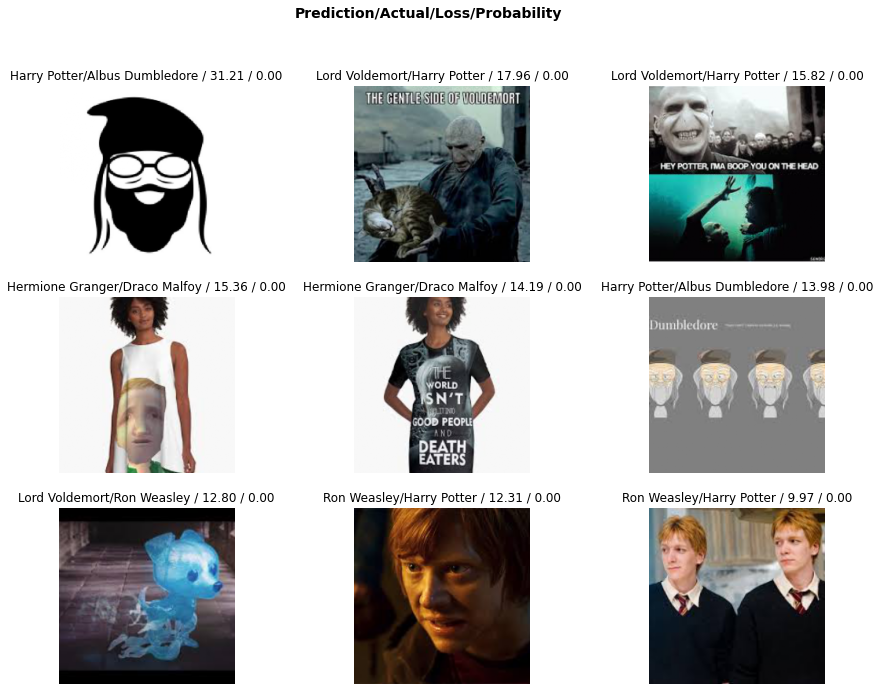

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

**Trying To analyse the results by plotting on matrix**

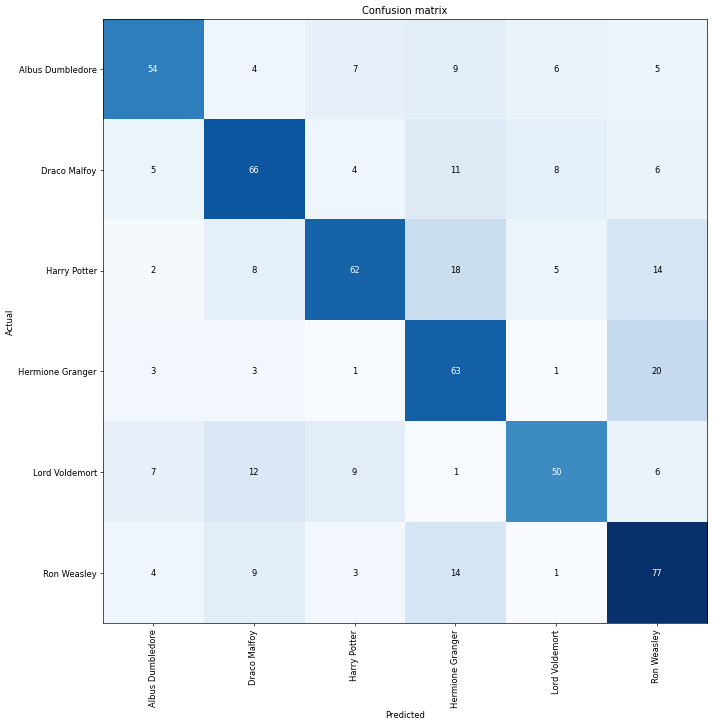

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [ ]:
interp.most_confused(min_val=2)

[('Hermione Granger', 'Ron Weasley', 20),
 ('Harry Potter', 'Hermione Granger', 18),
 ('Harry Potter', 'Ron Weasley', 14),
 ('Ron Weasley', 'Hermione Granger', 14),
 ('Lord Voldemort', 'Draco Malfoy', 12),
 ('Draco Malfoy', 'Hermione Granger', 11),
 ('Albus Dumbledore', 'Hermione Granger', 9),
 ('Lord Voldemort', 'Harry Potter', 9),
 ('Ron Weasley', 'Draco Malfoy', 9),
 ('Draco Malfoy', 'Lord Voldemort', 8),
 ('Harry Potter', 'Draco Malfoy', 8),
 ('Albus Dumbledore', 'Harry Potter', 7),
 ('Lord Voldemort', 'Albus Dumbledore', 7),
 ('Albus Dumbledore', 'Lord Voldemort', 6),
 ('Draco Malfoy', 'Ron Weasley', 6),
 ('Lord Voldemort', 'Ron Weasley', 6),
 ('Albus Dumbledore', 'Ron Weasley', 5),
 ('Draco Malfoy', 'Albus Dumbledore', 5),
 ('Harry Potter', 'Lord Voldemort', 5),
 ('Albus Dumbledore', 'Draco Malfoy', 4),
 ('Draco Malfoy', 'Harry Potter', 4),
 ('Ron Weasley', 'Albus Dumbledore', 4),
 ('Hermione Granger', 'Albus Dumbledore', 3),
 ('Hermione Granger', 'Draco Malfoy', 3),
 ('Ron Weasl

Saving the Training in form of learn variable as **"Training-Done"**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/ML_Projects/Project-1",exist_ok=True)
my_dir = "/content/drive/My Drive/ML_Projects/Project-1"

In [ ]:
learn.save(my_dir+"/Stage-1")
learn.load("/content/drive/My Drive/ML_Projects/Project-1/Stage-1")
learn.export(my_dir+"/export.pkl")

os.makedirs("/content/Values",exist_ok=True)
my_dirs = "/content/Values"
learn.save(my_dir+"/Stage-1")
learn.export(my_dir+"/export.pkl")

In [ ]:
from kora.drive import upload_public
Final_url= upload_public(my_dir+"/export.pkl")
Final_url

'https://drive.google.com/uc?id=1EsUQDLD9NPmcpiejnDNcs_BpnR2H-pI-'